# Import Dataset

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [39]:
df.shape

(10000, 18)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**Conclusion:**
* RowNumber, CustomerId, Surname are not relevant to us.
* Geography, Gender, Card Type are categorical columns.
* The remaining columns are numerical data.

### Categorical data exploration

In [41]:
print(f'Gender category: {np.unique(df["Gender"])}')
print(f'Geography category: {np.unique(df["Geography"])}')
print(f'Card Type category: {np.unique(df["Card Type"])}')

Gender category: ['Female' 'Male']
Geography category: ['France' 'Germany' 'Spain']
Card Type category: ['DIAMOND' 'GOLD' 'PLATINUM' 'SILVER']


### Missing Data

In [42]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

**Conclusion:** No missing data.

### Duplicated data

In [43]:
df.duplicated().sum()

np.int64(0)

**Conclusion:** No duplicated data.

# EDA

In [44]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


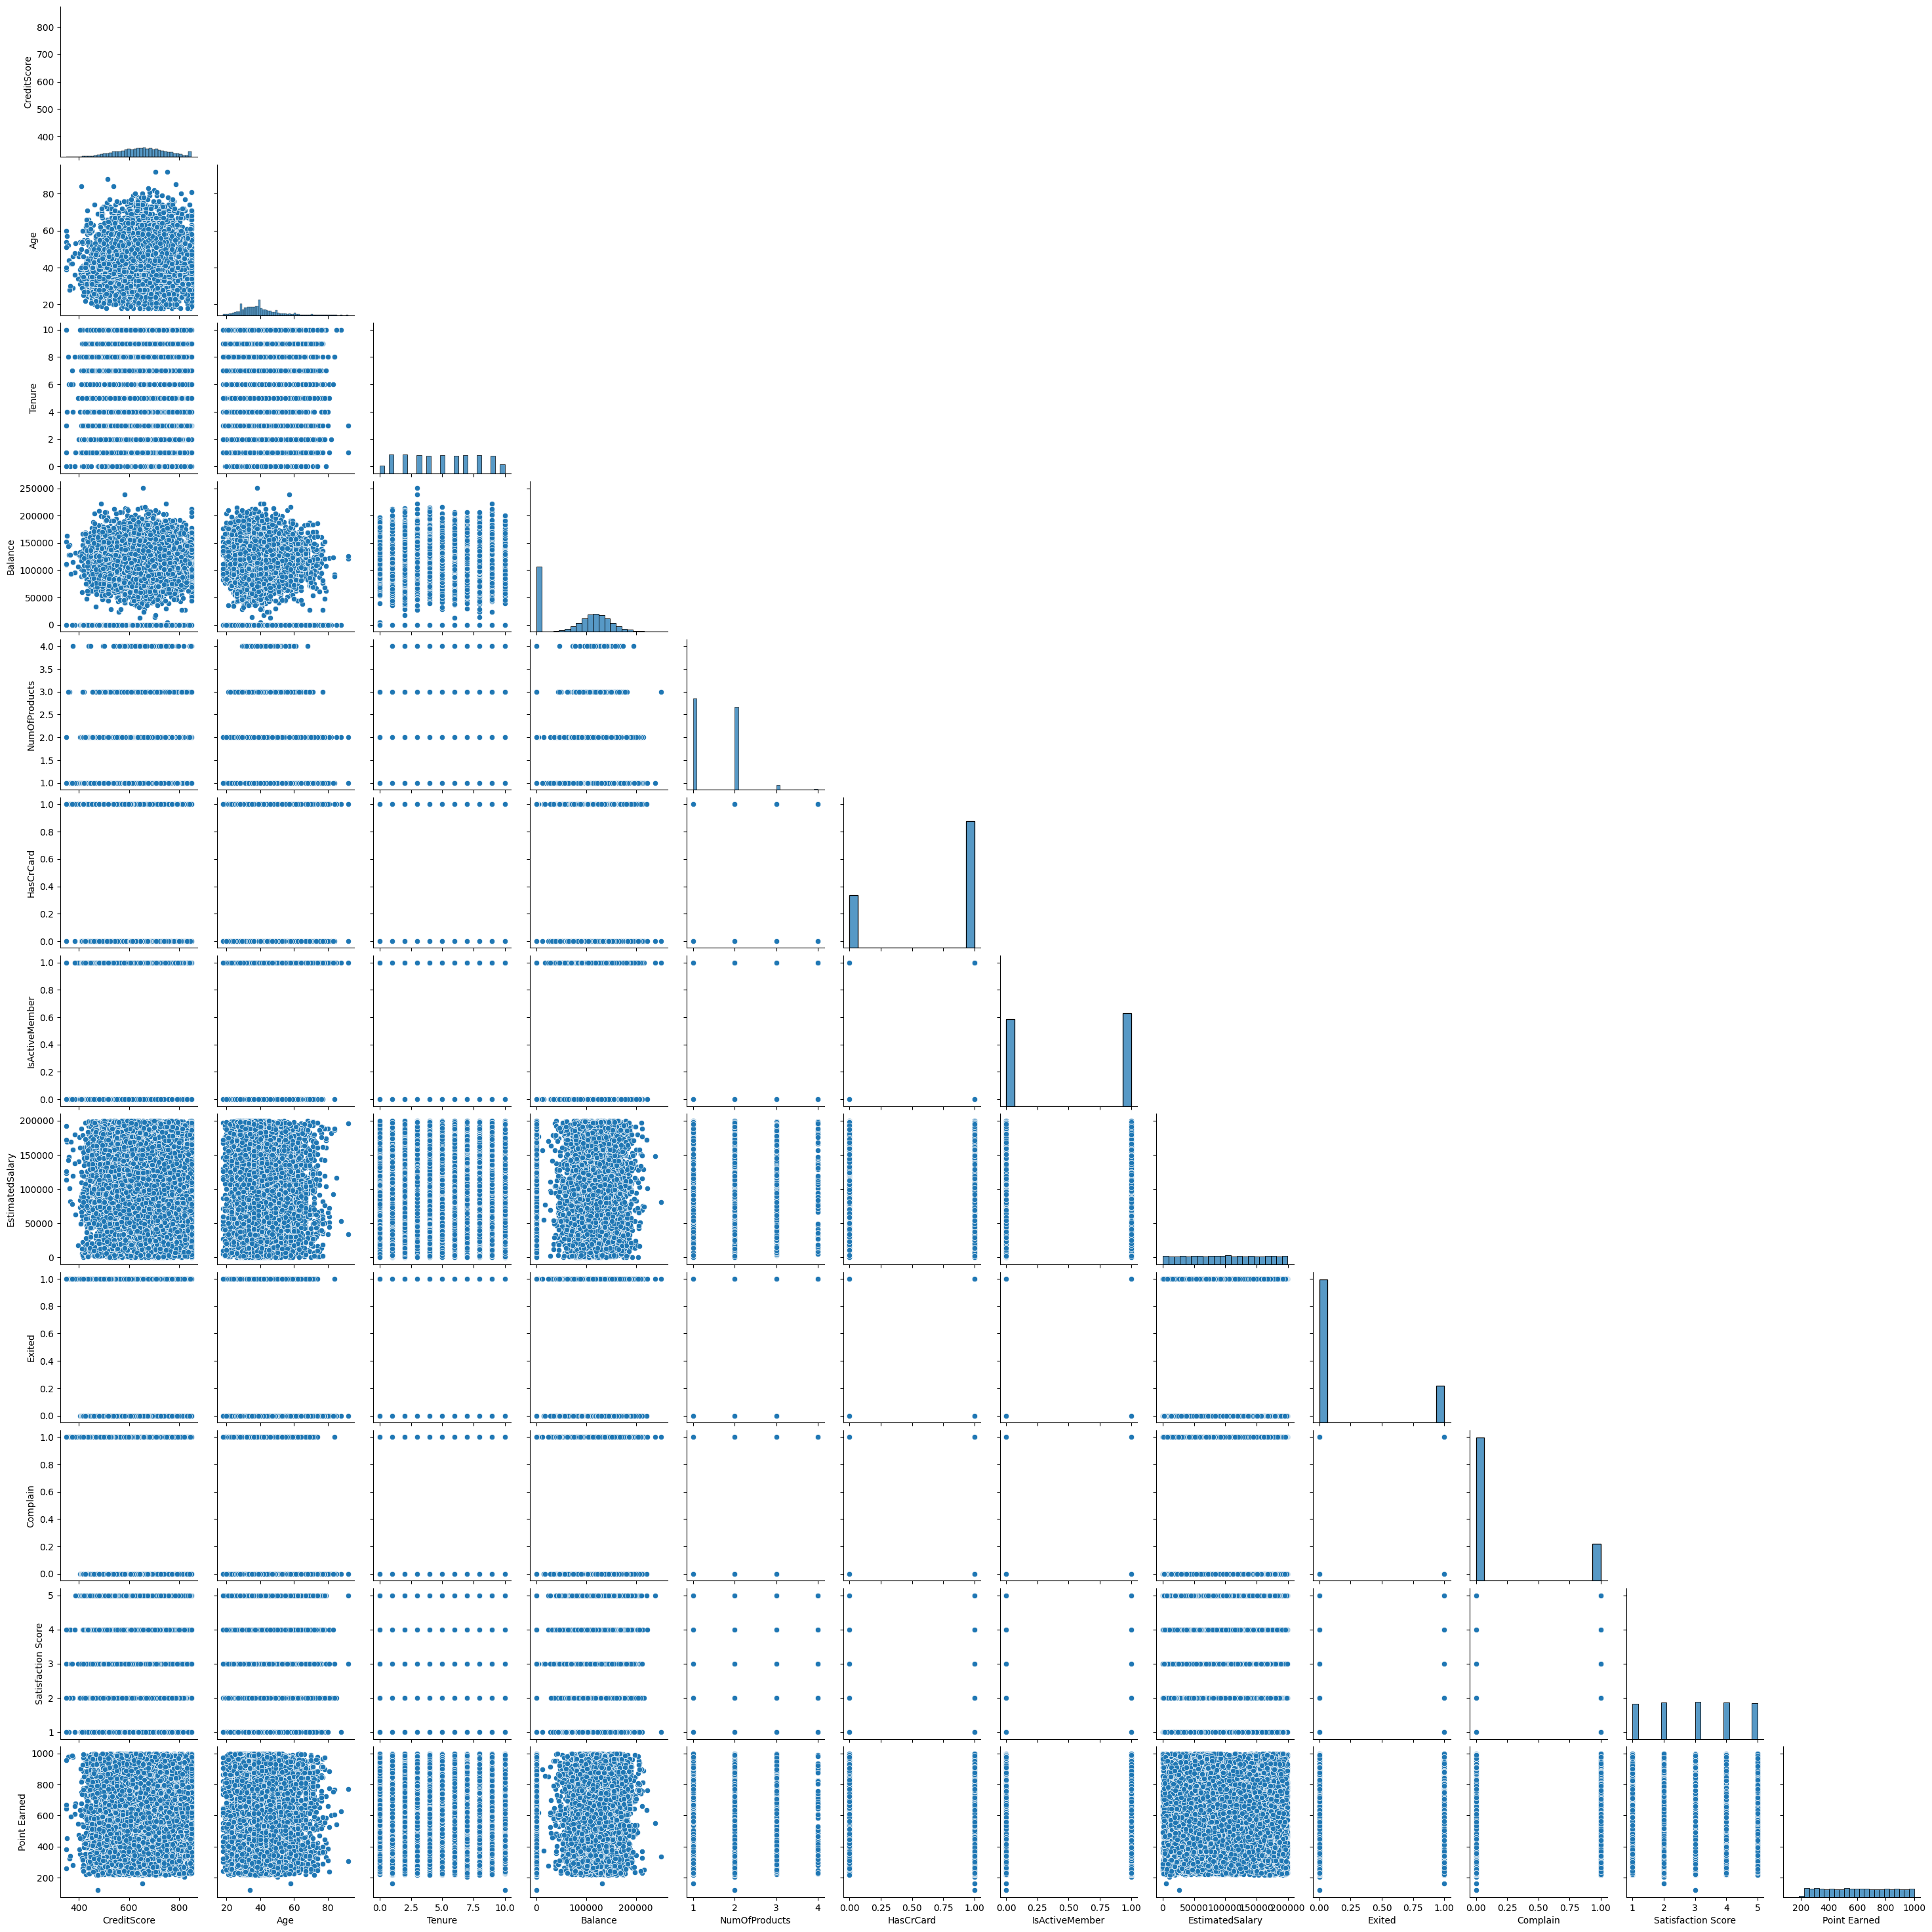

In [45]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

e = sns.pairplot(df_clean)
e.map_upper(hide_current_axis)


**Conclusion:** pair plot is not useful on this dataset.


### Counting The Exited Customers

<Axes: title={'center': 'Average 20.38%'}, xlabel='Exited', ylabel='count'>

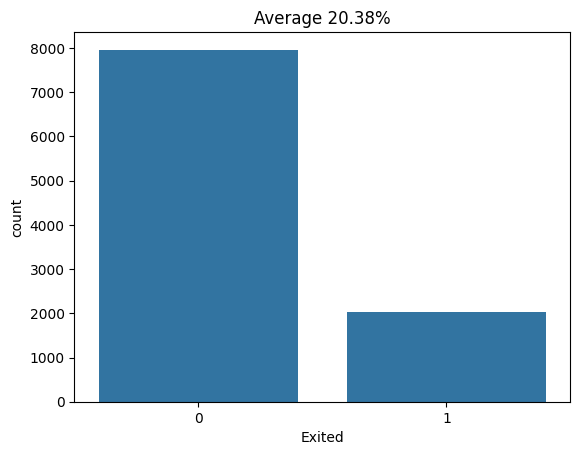

In [46]:
plt.title(f"Average {df_clean['Exited'].mean()*100:.2f}%")
sns.countplot(data=df_clean, x="Exited")

In [47]:
corr_matrix = df_clean.drop(["Geography","Gender","Card Type"], axis= 1).corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


<Axes: >

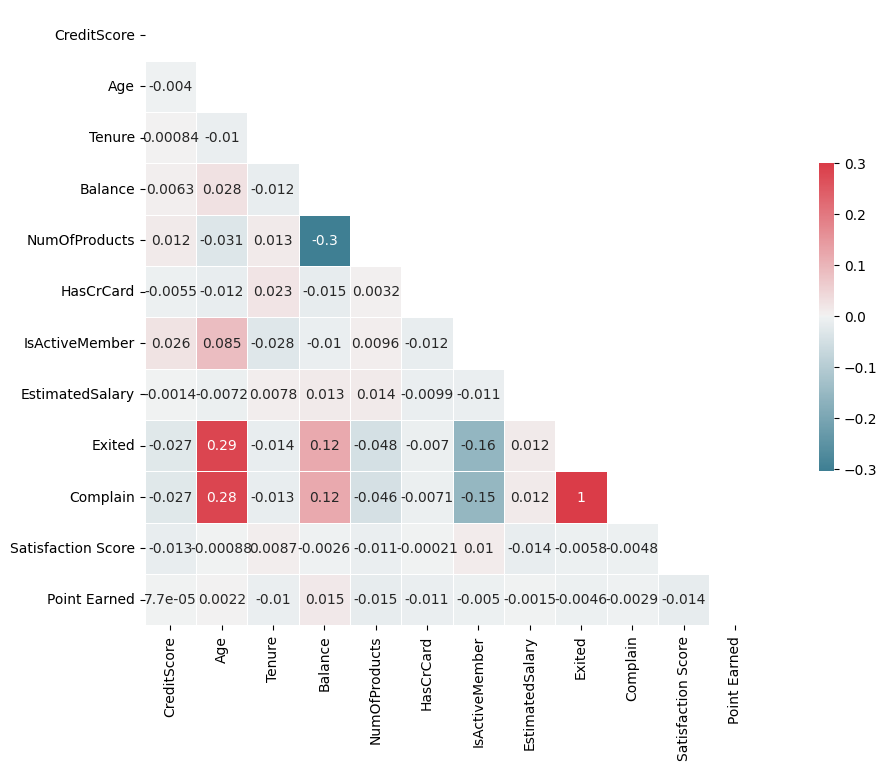

In [48]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)


**Conclusion:**

| Value 1        | Value 2       | Value | Observation   |
| -------------- | ------------- | ----- | ------------- |
| Exited         | Complain      | +1.00 | perfect correlation |
| Exited/Complain| Age           | +0.29 | moderate correlation |
| Exited/Complain|Balance        | +0.12 | weak correlation |
| Exited/Complain|IsActiveMember | -0.16 | weak inverse correlation |
| NumOfproducts  |Balance        | -0.30 | moderate inverse correlation |




### Customers Per Countries

<Axes: xlabel='Geography', ylabel='count'>

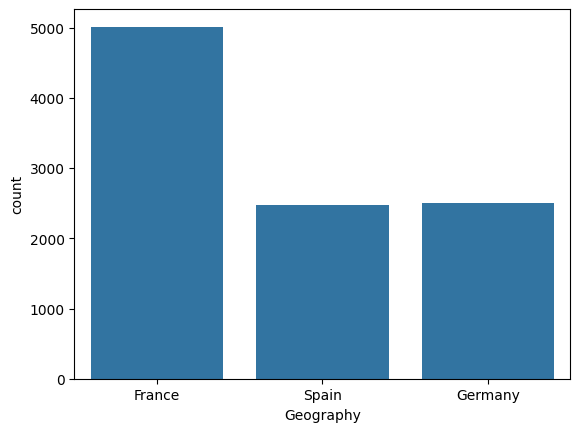

In [49]:
sns.countplot(data=df, x="Geography")

**Conclusion:** France is having as many customers as Spain and Germany combined together.

### Exited Per Geography

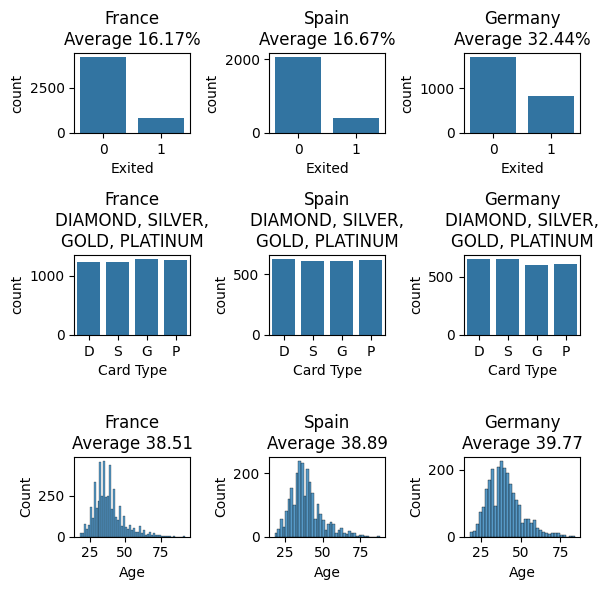

In [50]:
# create 3 dataset per countries
all_France = df_clean[ df_clean["Geography"] == "France" ]
all_Spain = df_clean[ df_clean["Geography"] == "Spain" ]
all_Germany = df_clean[ df_clean["Geography"] == "Germany" ]

# countplot of all 3 country on exited

nrows=3
ncols=3
size=2
index=1

plt.subplots(ncols=ncols,nrows=nrows, figsize=(ncols*size,nrows*size))

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"France\nAverage {all_France['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_France, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"Spain\nAverage {all_Spain['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_Spain, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"Germany\nAverage {all_Germany['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_Germany, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"France\nDIAMOND, SILVER,\nGOLD, PLATINUM")
ax = sns.countplot(data=all_France, x="Card Type")
ax.set_xticks(range(4))
ax.set_xticklabels(['D', 'S', 'G', 'P'])

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"Spain\nDIAMOND, SILVER,\nGOLD, PLATINUM")
ax = sns.countplot(data=all_Spain, x="Card Type")
ax.set_xticks(range(4))
ax.set_xticklabels(['D', 'S', 'G', 'P'])

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"Germany\nDIAMOND, SILVER,\nGOLD, PLATINUM")
ax = sns.countplot(data=all_Germany, x="Card Type")
ax.set_xticks(range(4))
ax.set_xticklabels(['D', 'S', 'G', 'P'])

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"France\nAverage {all_France['Age'].mean():.2f}")
sns.histplot(data=all_France, x="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"Spain\nAverage {all_Spain['Age'].mean():.2f}")
sns.histplot(data=all_Spain, x="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"Germany\nAverage {all_Germany['Age'].mean():.2f}")
sns.histplot(data=all_Germany, x="Age")

plt.tight_layout()

**Conclusion:**
* German customers are twice as likely to exit.
* Card Types are not relevant to determine why  customer are leaving.

In [51]:
all_France_males = all_France[ all_France["Gender"] == "Male" ]
all_France_females = all_France[ all_France["Gender"] == "Female" ]
all_Spain_males = all_Spain[ all_Spain["Gender"] == "Male" ]
all_Spain_females = all_Spain[ all_Spain["Gender"] == "Female" ]
all_Germany_males = all_Germany[ all_Germany["Gender"] == "Male" ]
all_Germany_females = all_Germany[ all_Germany["Gender"] == "Female" ]

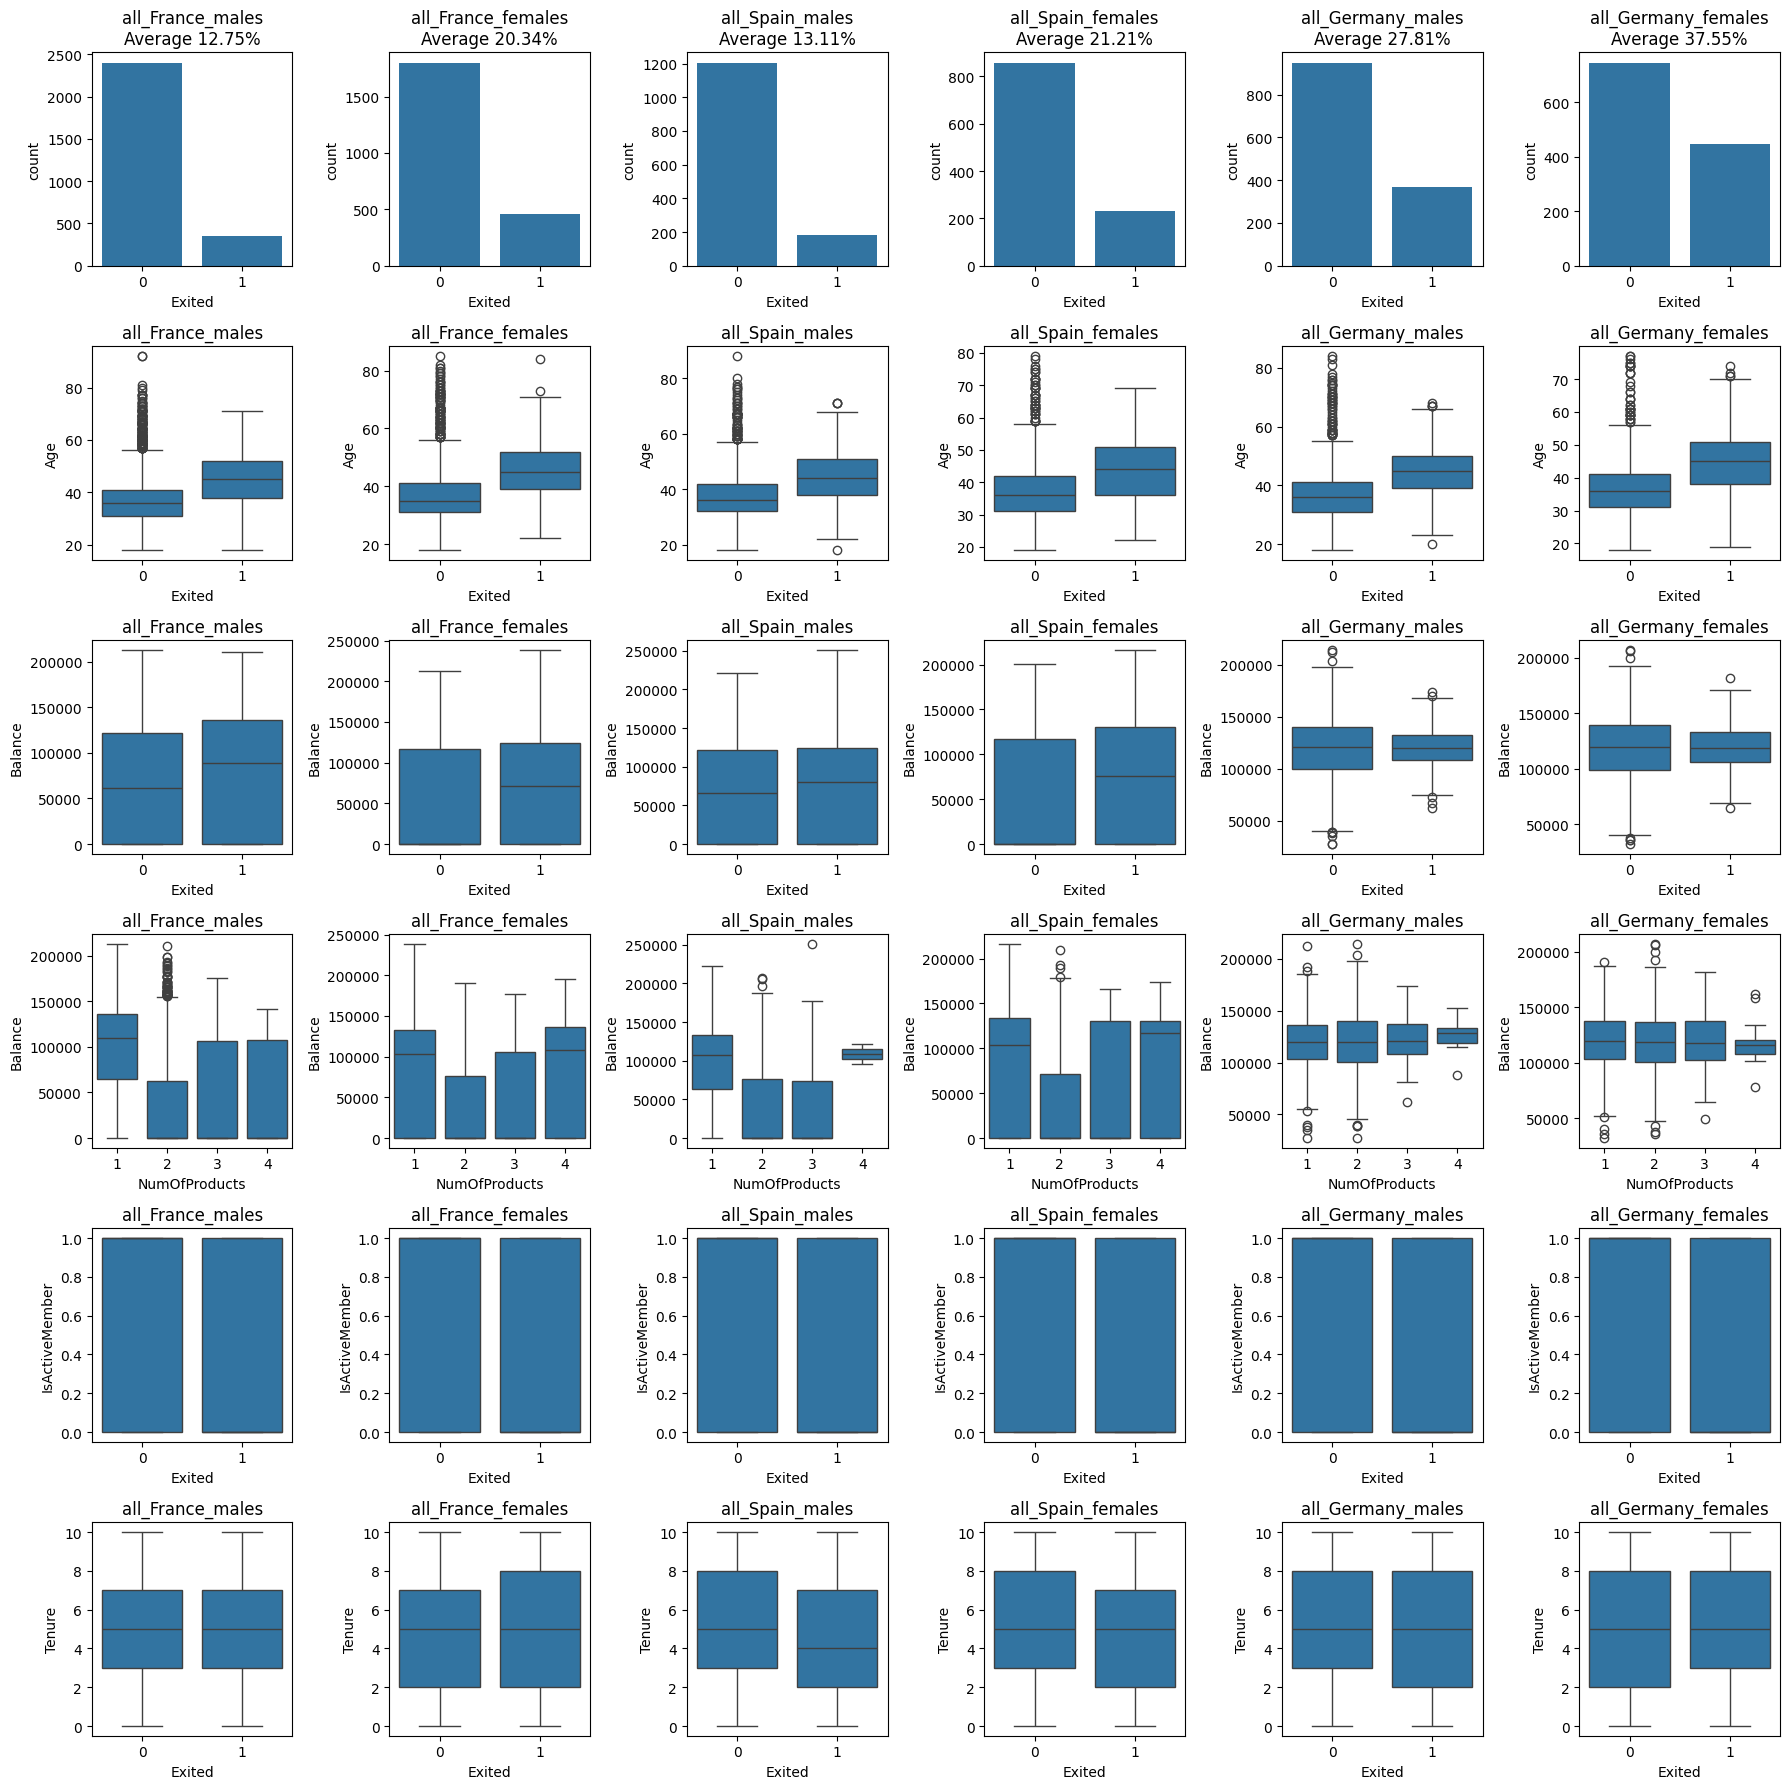

In [52]:
nrows=6
ncols=6
size=3
index=1

plt.subplots(ncols=ncols,nrows=nrows, figsize=(ncols*size,nrows*size))

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_males\nAverage {all_France_males['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_France_males, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_females\nAverage {all_France_females['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_France_females, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_males\nAverage {all_Spain_males['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_Spain_males, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_females\nAverage {all_Spain_females['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_Spain_females, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_males\nAverage {all_Germany_males['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_Germany_males, x="Exited")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_females\nAverage {all_Germany_females['Exited'].mean()*100:.2f}%")
sns.countplot(data=all_Germany_females, x="Exited")

# 
# 

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_males")
sns.boxplot(data=all_France_males, x="Exited", y="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_females")
sns.boxplot(data=all_France_females, x="Exited", y="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_males")
sns.boxplot(data=all_Spain_males, x="Exited", y="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_females")
sns.boxplot(data=all_Spain_females, x="Exited", y="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_males")
sns.boxplot(data=all_Germany_males, x="Exited", y="Age")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_females")
sns.boxplot(data=all_Germany_females, x="Exited", y="Age")

# 
# 

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_males")
sns.boxplot(data=all_France_males, x="Exited", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_females")
sns.boxplot(data=all_France_females, x="Exited", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_males")
sns.boxplot(data=all_Spain_males, x="Exited", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_females")
sns.boxplot(data=all_Spain_females, x="Exited", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_males")
sns.boxplot(data=all_Germany_males, x="Exited", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_females")
sns.boxplot(data=all_Germany_females, x="Exited", y="Balance")

# 
# 

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_males")
sns.boxplot(data=all_France_males, x="NumOfProducts", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_females")
sns.boxplot(data=all_France_females, x="NumOfProducts", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_males")
sns.boxplot(data=all_Spain_males, x="NumOfProducts", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_females")
sns.boxplot(data=all_Spain_females, x="NumOfProducts", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_males")
sns.boxplot(data=all_Germany_males, x="NumOfProducts", y="Balance")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_females")
sns.boxplot(data=all_Germany_females, x="NumOfProducts", y="Balance")

# 
# 

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_males")
sns.boxplot(data=all_France_males, x="Exited", y="IsActiveMember")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_females")
sns.boxplot(data=all_France_females, x="Exited", y="IsActiveMember")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_males")
sns.boxplot(data=all_Spain_males, x="Exited", y="IsActiveMember")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_females")
sns.boxplot(data=all_Spain_females, x="Exited", y="IsActiveMember")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_males")
sns.boxplot(data=all_Germany_males, x="Exited", y="IsActiveMember")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_females")
sns.boxplot(data=all_Germany_females, x="Exited", y="IsActiveMember")

# 
# 

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_males")
sns.boxplot(data=all_France_males, x="Exited", y="Tenure")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_France_females")
sns.boxplot(data=all_France_females, x="Exited", y="Tenure")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_males")
sns.boxplot(data=all_Spain_males, x="Exited", y="Tenure")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Spain_females")
sns.boxplot(data=all_Spain_females, x="Exited", y="Tenure")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_males")
sns.boxplot(data=all_Germany_males, x="Exited", y="Tenure")

plt.subplot(nrows,ncols, index)
index += 1

plt.title(f"all_Germany_females")
sns.boxplot(data=all_Germany_females, x="Exited", y="Tenure")

# 
# 

plt.tight_layout()


**Conclusion:**
* Females customer are more likely to exit than men (30-80% more likely).
* German customers are the most likely to exit compared to other countries.
* In all countries, the older and richer a customer get, the more likely to exit the bank they are.
* The balance between countries show that Germany is dominantly wealthier.
* we confirmed that the inverse correlation of balance/NumberOfProducts is applicable to France and Spain, but not Germany.
* we can confirm that the activity/tenure of a customer won't help determine if they might exit the bank.

# Final Conclusion
* The wealthier and older a customer get, the more likely to leave the bank they are.
* German customers are wealthier than French and Spanish customers and therefore more likely to leave.
* Complaining customers 100% going to leave.

# Recommendations
* The bank should make it more appealing for its wealthiest and aging customers to stay (investment banking. loyalty schemes, etc.).
* The bank should highly consider complaining customers as at risk of leaving and react accordingly.